# Одномерная фильтрация

## Однофазная фильтрация несжимаемой жидкости

### Уравнения

Уравнения неразрывности и движения для однофазного потока в неупругой пористой среде
$$ \begin{cases}
\frac{\partial \rho}{\partial t} + \nabla \cdot (\rho \vec{v}) = 0 \\
v = -\frac{k}{\mu} \nabla P \\
\end{cases} $$

Пусть $\rho = const$

$$ \begin{cases}
\nabla \cdot  \vec{v} = 0 \\
\vec{v} = -\frac{k}{\mu} \nabla P \\
\end{cases} $$

Пусть поток одномерен

$$ \begin{cases}
\frac{\partial v}{\partial x} = 0 \\
v = -\frac{k}{\mu} \frac{\partial P}{\partial x} \\
\end{cases} $$

### Численное решение

Дискретизируем методом конечных разностей

$$ \begin{cases}
\frac{v_{i+1} - v_{i}}{h} = 0 \\
v_i = -\frac{k}{\mu} \frac{P_{i+1} - P_{i}}{h} \\
\end{cases} $$

Из первого уравнения следует

$$ P_{i-1} - 2P_{i} + P_{i+1} = 0 $$

Задача сводится к нахождению поля давления

![Расчетная сетка](grid1d.png)

Пусть расчетная область состоит из 5-и узловых точек, в первой и последней задаются граничные условия в виде давления, тогда система примет вид

$$
\begin{pmatrix}
-2 &  1 &  0 \\
1  & -2 &  1 \\
0  &  1 & -2 \\
\end{pmatrix} 
\cdot
\begin{pmatrix}
P_1 \\
P_2 \\
P_3 \\
\end{pmatrix}
=
\begin{pmatrix}
-P_0 \\
0 \\
-P_4 \\
\end{pmatrix}

$$
$$
\textbf{Ax} = \textbf{B}
$$

In [101]:
import numpy as np

# Кол-во узловых точек
n = 10

# Длина расчетной области
L = 2

# Граничные условия (начало и конец расчетной области)
P0 = 2
Pn = 1

A = np.zeros([n-2, n-2])
for i in range(n-2):
    A[i][i] = -2
    if i < n-3:
        A[i][i+1] = 1
    if i > 0:
        A[i][i-1] = 1

B = np.zeros(n - 2)
B[0], B[-1] = -P0, -Pn

In [102]:
P_solve = np.linalg.solve(A, B)
P = np.zeros(n)

x = np.arange(0, L + L/n , L/(n - 1))

P[0] = P0
P[-1] = Pn
P[1:-1] = P_solve
P, x

(array([2.        , 1.88888889, 1.77777778, 1.66666667, 1.55555556,
        1.44444444, 1.33333333, 1.22222222, 1.11111111, 1.        ]),
 array([0.        , 0.22222222, 0.44444444, 0.66666667, 0.88888889,
        1.11111111, 1.33333333, 1.55555556, 1.77777778, 2.        ]))

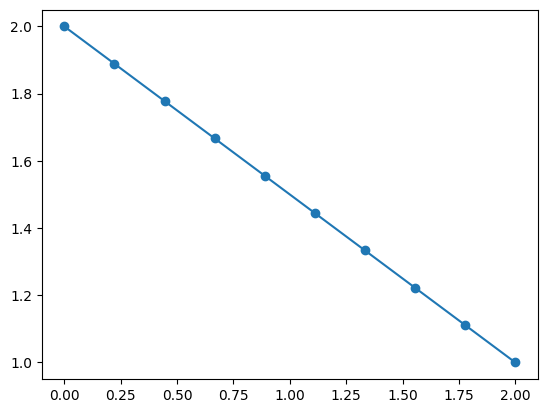

In [103]:
# import plotly.express as px
import matplotlib.pyplot as plt

plt.plot(x, P, marker='o')
plt.show()

## Однофазная фильтрация сжимаемой жидкости

### Уравнения

Уравнения неразрывности и движения для однофазного потока в неупругой пористой среде
$$ \begin{cases}
\frac{\partial \rho}{\partial t} + \nabla \cdot (\rho \vec{v}) = 0 \\
v = -\frac{k}{\mu} \nabla P \\
\rho = f(P)\\
\end{cases} $$